In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))

import json
import time
from os import path

import matplotlib.patches as patches

import pandas as pd

import camhd_motion_analysis as ma


In [2]:
#metadata_repo = "/Users/aaron/workspace/CamHD_analysis/CamHD_motion_metadata/"  # On Mac
metadata_repo = "/home/aaron/canine/camhd_analysis/CamHD_motion_metadata"

data_filename = "/RS03ASHS/PN03B/06-CAMHDA301/2016/03/01/CAMHDA301-20160301T000000Z_optical_flow.json"

data_file = metadata_repo + data_filename

In [11]:
data = ma.load_and_clean_json( data_file )
valid = ma.flatten_structure( ma.select_valid( data ) )
print(valid.columns)

Index(['scale', 'theta', 'trans_x', 'trans_y', 'center_x', 'center_y ',
       'duration_us', 'flowScale', 'fromFrame', 'imgScale', 'performance',
       'toFrame', 'valid', 'trans'],
      dtype='object')


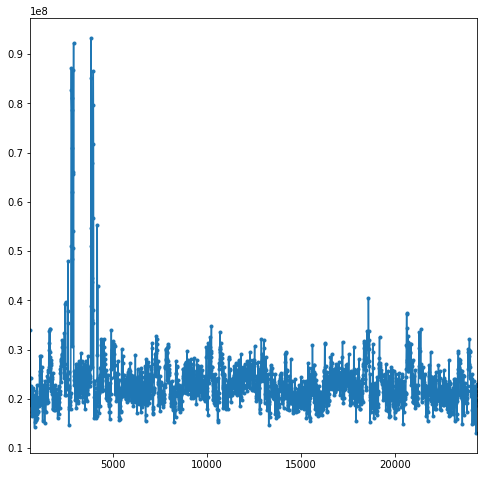

In [12]:
valid.duration_us.plot(style='.-')


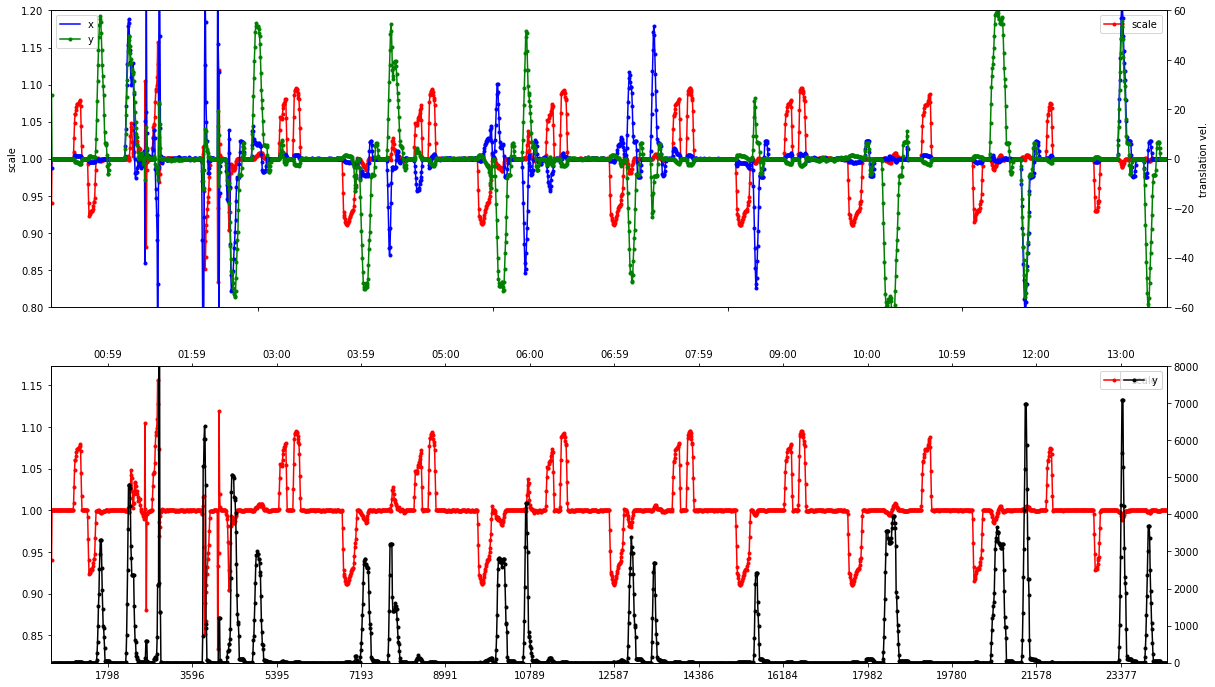

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,12))

scale_lim = [0.8,1.2]
trans_lim = [-60,60]
total_trans_lim=[-5,8000]

ticks_secs = 60
ticks = np.arange(0.0, max(valid.index), 29.97*ticks_secs)
#axes[0].set_xticks(ticks)
axes[1].set_xticks(ticks)

raxes = axes[0].twinx()
valid.scale.rolling(window=3,center=False).mean().plot(style='r.-', ax=axes[0], ylim=scale_lim,label='scale', legend=True)
axes[0].set_ylabel('scale')
valid.trans_x.rolling(window=3,center=False).mean().plot(style='b.-', ax=raxes, ylim=trans_lim, label='x', legend=True)
raxes.set_ylabel('translation vel.')
valid.trans_y.rolling(window=3,center=False).mean().plot(style='g.-', ax=raxes, ylim=trans_lim, label='y', legend=True)

raxes = axes[1].twinx()
valid.scale.rolling(window=3,center=False).mean().plot(style='r.-', ax=axes[1], label='scale', legend=True)
valid.trans.rolling(window=5,center=False).median().plot(style='k.-', ax=raxes, ylim=total_trans_lim, label='y', legend=True)


timeaxes = axes[1].twiny() 
timeticks = axes[1].get_xticks()

def tick_function(f):
    V = f / 29.97
    return [time.strftime("%M:%S", time.gmtime(z))  for z in V]

timeaxes.set_xticks(timeticks)
timeaxes.set_xbound(axes[1].get_xbound())
timeaxes.set_xticklabels(tick_function(timeticks));


In [6]:
stable = valid.loc[lambda df: df.trans < 100].loc[ lambda df: (df.scale-1).abs() < 0.01 ]

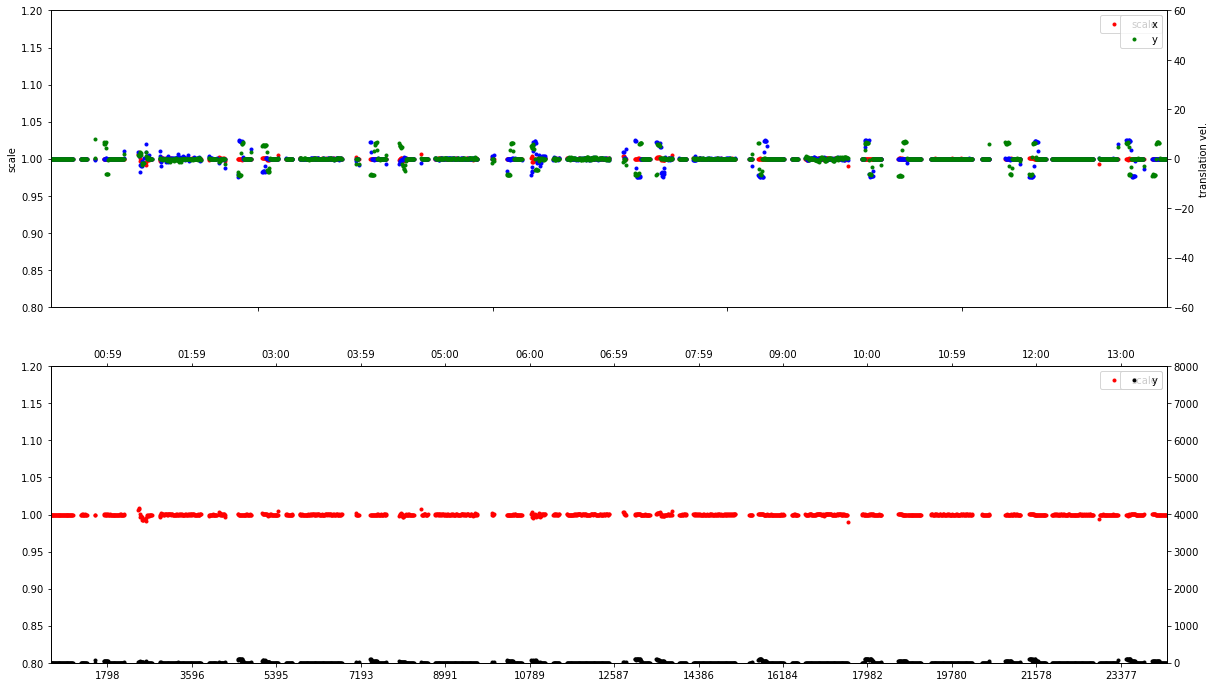

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,12))

ticks_secs = 60
ticks = np.arange(0.0, max(valid.index), 29.97*ticks_secs)
#axes[0].set_xticks(ticks)
axes[1].set_xticks(ticks)

raxes = axes[0].twinx()
stable.scale.plot(style='r.', ax=axes[0], label='scale', ylim=scale_lim, legend=True)
axes[0].set_ylabel('scale')
stable.trans_x.plot(style='b.', ax=raxes,  ylim=trans_lim, label='x', legend=True)
raxes.set_ylabel('translation vel.')
stable.trans_y.plot(style='g.', ax=raxes,  ylim=trans_lim, label='y', legend=True)

raxes = axes[1].twinx()
stable.scale.plot(style='r.', ax=axes[1], ylim=scale_lim, label='scale', legend=True)
stable.trans.plot(style='k.', ax=raxes, label='y', ylim=total_trans_lim,  legend=True)


timeaxes = axes[1].twiny() 
timeticks = axes[1].get_xticks()

def tick_function(f):
    V = f / 29.97
    return [time.strftime("%M:%S", time.gmtime(z))  for z in V]

timeaxes.set_xticks(timeticks)
timeaxes.set_xbound(axes[1].get_xbound())
timeaxes.set_xticklabels(tick_function(timeticks));



In [9]:

stable_regions = ma.contiguous_region( stable )
classify = ma.classify_regions( valid, stable_regions )

classify.sort(key=lambda x: x["startFrame"])


NameError: name 'region' is not defined

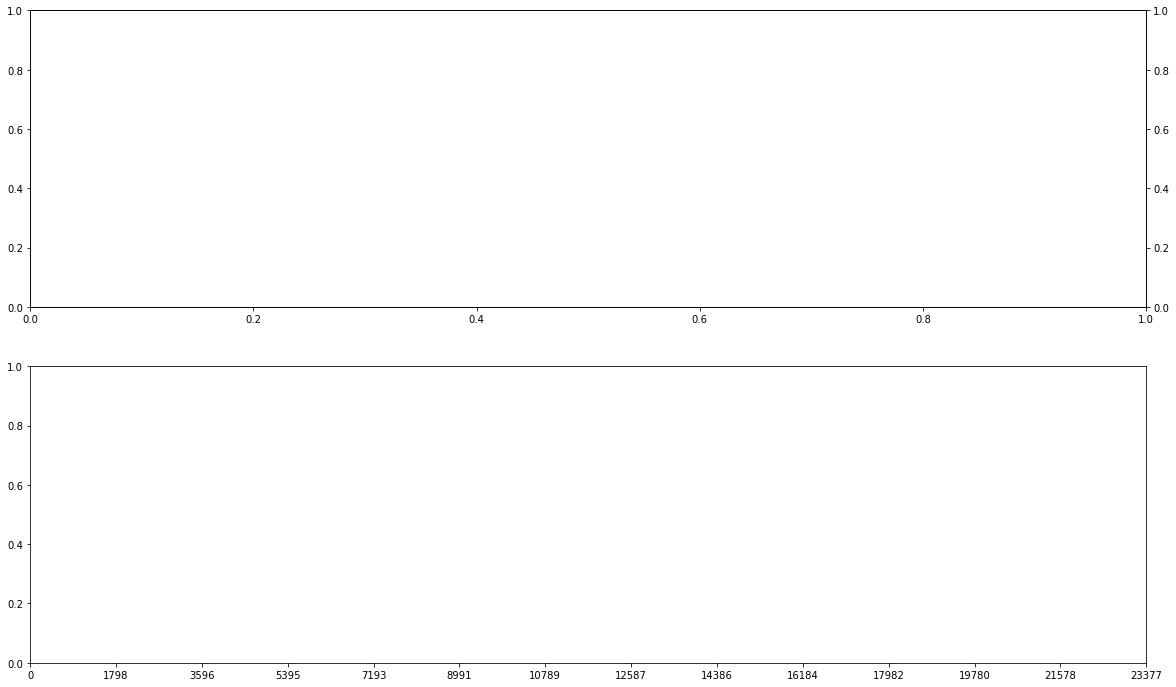

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,12))

ticks_secs = 60
ticks = np.arange(0.0, max(valid.index), 29.97*ticks_secs)
#axes[0].set_xticks(ticks)
axes[1].set_xticks(ticks)

raxes = axes[0].twinx()
region.scale.plot(style='r.', ax=axes[0], label='scale', ylim=scale_lim, legend=True)
axes[0].set_ylabel('scale')
region.trans_x.plot(style='b.', ax=raxes,  ylim=trans_lim, label='x', legend=True)
raxes.set_ylabel('translation vel.')
region.trans_y.plot(style='g.', ax=raxes,  ylim=trans_lim, label='y', legend=True)

raxes = axes[1].twinx()
region.scale.plot(style='r.', ax=axes[1], ylim=scale_lim, label='scale', legend=True)
region.trans.plot(style='k.', ax=raxes, label='y', ylim=total_trans_lim,  legend=True)


timeaxes = axes[1].twiny() 
timeticks = axes[1].get_xticks()

def tick_function(f):
    V = f / 29.97
    return [time.strftime("%M:%S", time.gmtime(z))  for z in V]

timeaxes.set_xticks(timeticks)
timeaxes.set_xbound(axes[1].get_xbound())
timeaxes.set_xticklabels(tick_function(timeticks));